In [ ]:
######################## Python Translate Script ########################

## Here's the start of our Python script. Thanks for completing it for me! - Dr. X
## IMPORTANT: install BioPython so that this will work


In [3]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [4]:
#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#

## 1 ##
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.

def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {} #dictionary initialized
    for record in SeqIO.parse(fasta_fn, "fasta"): #iterating over each record in fasta_fn file
        description = record.description.split() #splitting the metadata into list
        species_name = description[1] + " " + description[2] #assigning first and third word in list to species name
        sequence_data_dict[species_name] = record.seq #sequence added ot dictionary with species name as key
    return(sequence_data_dict) #returns dictionary

#Rabsa: This function retrieves the sequences from a fasta formatted file and returns them ina  dictionary, with the species name as a key. Please refer to comments in code for my explanation.

In [5]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides

from Bio.Data import CodonTable

def translate_function(string_nucleotides):
    aa_seq_string = ""
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    for i in range(0, len(string_nucleotides) -2, 3):
        codon = string_nucleotides[i:i+3]
        if codon in mito_table.stop_codons:
            break
        aa_seq_string += mito_table.forward_table[codon]
    return aa_seq_string


In [6]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

from Bio.Seq import Seq

def better_translate(string_nucleotides):
    aa_seq = Seq(string_nucleotides)
    aa_seq_string = aa_seq.translate()
    return aa_seq_string


In [7]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

def compute_molecular_weight(aa_seq):
    new_seq = ""
    for i in range(0, len(aa_seq) - 2,3): #checking for stop codons
        codon = aa_seq[i:i+3]
        if codon in ['UAA', 'UGA', 'UAG']:
            break
        else :
            new_seq += codon 
    analyzed_seq = ProteinAnalysis(new_seq) #only analyzing sequence up to stop codon
    mol_weight = analyzed_seq.molecular_weight()
    return mol_weight

In [8]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

def gc_content(dna_seq):
    seq = Seq(dna_seq)
    return ((seq.count("G") + seq.count("C"))/len(seq))

In [9]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

penguins_df['molecular_weight'] = "NaN"
penguins_df["GC_content"] = "NaN"

In [10]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

for key, value in cytb_seqs.items():
    aa_seq = translate_function(value)
    mol_weight = compute_molecular_weight(aa_seq)
    gc = gc_content(value)
    penguins_df.loc[penguins_df.species==key, 'molecular_weight'] = mol_weight
    penguins_df.loc[penguins_df.species==key, 'GC_content'] = gc

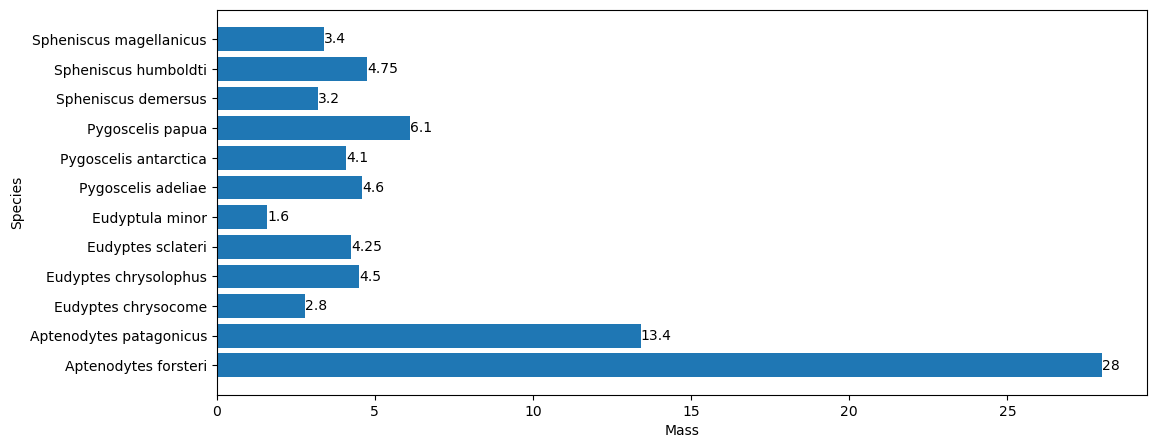

In [11]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

def addlabels(x,y):
    for i in range(len(x)):
        plot.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8))
        
import matplotlib.pyplot as plot

fig, plt = plot.subplots(figsize=(12,5))


p = plot.barh(species_list, penguins_df.mass)
    
plot.xlabel("Mass")
plot.ylabel("Species")

plt.bar_label(p) #https://stackoverflow.com/questions/70326023/adding-data-labels-to-a-horizontal-bar-chart-in-matplotlib

plot.show()

#Rabsa
#Q1: Eudyptes minor is the smallest penguin species from this data. 

#Q2: Eudyptula minor is found throughout the southern coast of Australia and as far north as the South Solitary Island off the coast of New South Wales. They are also native to the coasts of New Zealand. (Hoskins, et al., 2008)
#https://animaldiversity.org/accounts/Eudyptula_minor/#geographic_range

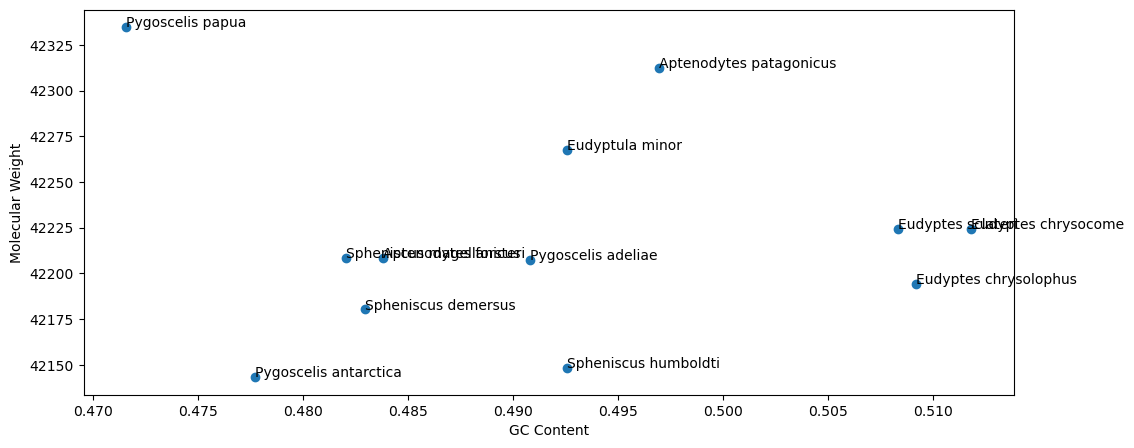

In [12]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

fig, plt2 = plot.subplots(figsize=(12,5))


p2 = plot.scatter(penguins_df.GC_content, penguins_df.molecular_weight)
    
plot.xlabel("GC Content")
plot.ylabel("Molecular Weight")


for idx, row in penguins_df.iterrows(): #https://stackoverflow.com/questions/64853894/how-to-annotate-points-in-a-scatterplot-based-on-a-pandas-column
    plt2.annotate(row['species'], (row['GC_content'], row['molecular_weight']))

plot.show()


In [13]:
## 10 ##
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

penguins_df.to_csv("penguins_mass_cytb.csv")

Text(0.5, 0, 'All Species')

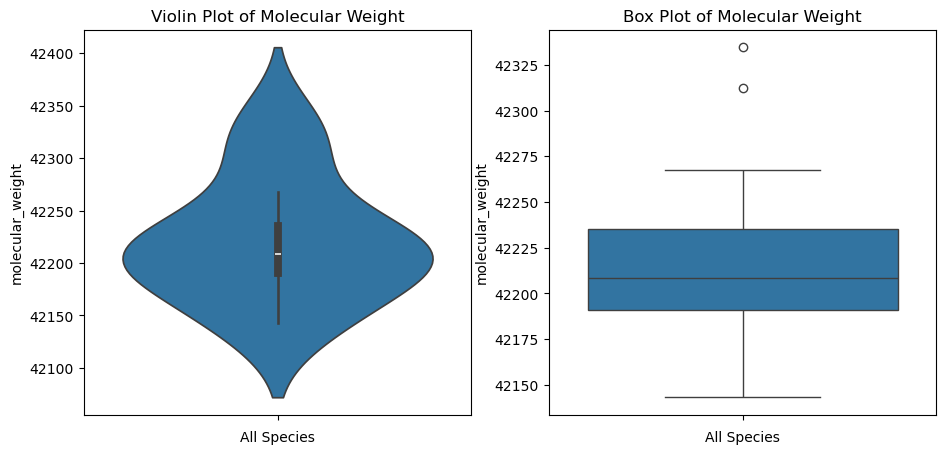

In [25]:
## 11 - BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)
import seaborn as sns

fig, axs = plot.subplots(nrows = 1, ncols = 2, figsize=(11,5))

sns.violinplot(y="molecular_weight", data=penguins_df, ax=axs[0])
axs[0].set_title("Violin Plot of Molecular Weight")
axs[0].set_xlabel('All Species')

sns.boxplot(y="molecular_weight", data=penguins_df, ax=axs[1])
axs[1].set_title("Box Plot of Molecular Weight")
axs[1].set_xlabel('All Species')
    

#Rabsa: Two different ways to visualize the distribution of molecular weight across all penguin species